# Investigate the Quality of Flower102

In [1]:
!pip install torchvision scienceplots einops torchinfo randomname seaborn -q


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [2]:
from torchvision import datasets

# TODO: replace with package after public on PyPi
import sys

sys.path.append("../")

from src.cleaner.selfclean import PretrainingType, SelfClean

/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../ssl_library/src/models/encoders/swin_transformer.py:896: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or pretrained_layers[0] is "*"
/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../ssl_library/src/models/encoders/swin_transformer.py:982: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or (len(frozen_layers) > 0 and frozen_layers[0] is "*")
/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../ssl_library/src/models/encoders/swin_transformer.py:990: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or (len(frozen_layers) > 0 and frozen_layers[0] is "*")
/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../ssl_library/src/utils/metrics.py:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
  output=mask.int() if mode is "binary" else mask.argmax(dim=1).int(),
/home/fabian/Documents/_git/GitHub/digital-d

In [3]:
dataset = datasets.Flowers102(root='./tmp', download=True)

  0%|          | 0/344862509 [00:00<?, ?it/s]

Extracting tmp/flowers-102/102flowers.tgz to tmp/flowers-102


  0%|          | 0/502 [00:00<?, ?it/s]

  0%|          | 0/14989 [00:00<?, ?it/s]

Will run the code on one GPU.
STARTUP | distributed init (rank 0): env://


/home/fabian/.local/lib/python3.9/site-packages/torchvision/transforms/transforms.py:899: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


Running on: cuda
Run directory of model: /home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/DINO-Flowers102-persistent-container
Data loaded: there are 1020 train images, 32 batches, and a batch size of 4.
Single GPU detected, model will run on single instance.
Single GPU detected, model will run on single instance.
Student and Teacher are built: they are both vit_tiny network.
Pre-trained weights not found. Training from scratch.


Epoch: 1, Train loss: 8.316051, Train stud/teach acc: 0.0357: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:23<00:00,  1.35it/s]
Epoch: 2, Train loss: 8.307707, Train stud/teach acc: 0.0000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:21<00:00,  1.48it/s]
Epoch: 3, Train loss: 8.274742, Train stud/teach acc: 0.0000: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:24<00:00,  1.29it/s]
Epoch: 4, Train loss: 8.266109, Train stud/teach acc: 0.0357: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:2

Epoch: 33, Train loss: 7.817510, Train stud/teach acc: 0.1071: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:20<00:00,  1.53it/s]
Epoch: 34, Train loss: 7.784643, Train stud/teach acc: 0.3571: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:20<00:00,  1.53it/s]
Epoch: 35, Train loss: 7.729507, Train stud/teach acc: 0.1071: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:21<00:00,  1.52it/s]
Epoch: 36, Train loss: 7.733924, Train stud/teach acc: 0.0000: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:2

Saving checkpoint: /home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/DINO-Flowers102-persistent-container/checkpoints/checkpoint-epoch50.pth ...
Saving current best: model_best.pth ...


Processing possible near duplicates: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 52/52 [00:00<00:00, 98.08it/s]


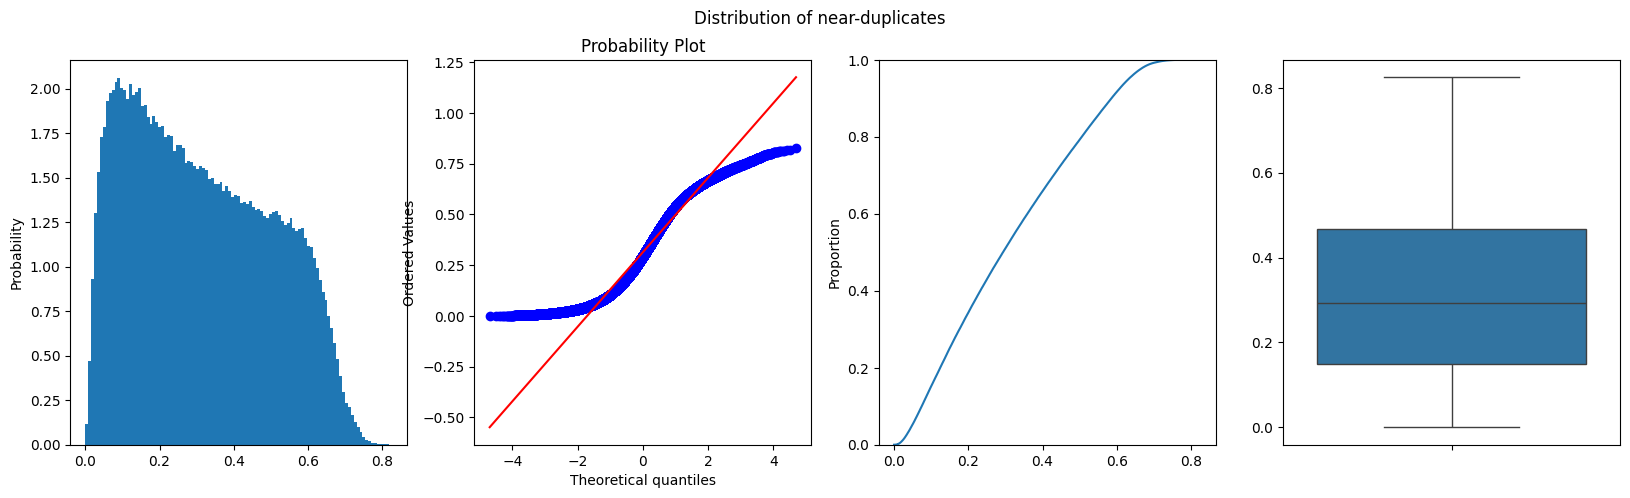

Processing possible irrelevant samples: 2039it [00:00, 38314.87it/s]


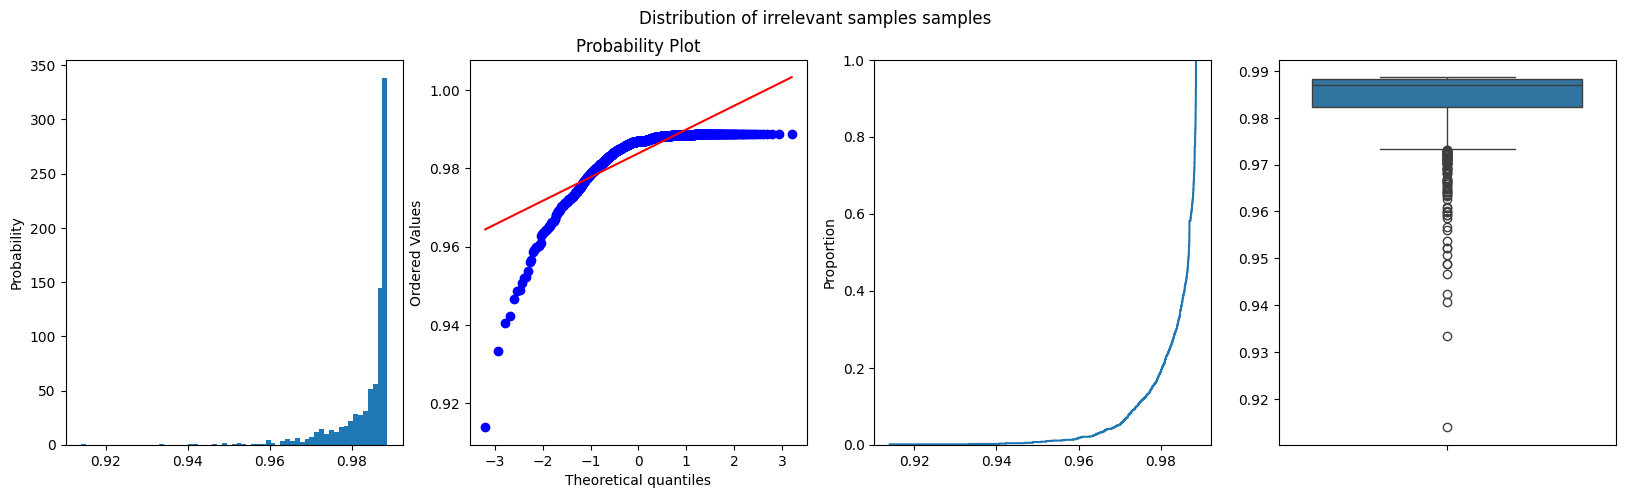

/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../src/cleaner/label_errors/intra_extra_distance_mixin.py:30: RuntimeWarning: invalid value encountered in multiply
  min_same = np.nanmin((o_hot_same * self.distance_matrix), axis=-1)
/home/fabian/Documents/_git/GitHub/digital-dermatology/SelfClean/examples/../src/cleaner/label_errors/intra_extra_distance_mixin.py:31: RuntimeWarning: invalid value encountered in multiply
  min_diff = np.nanmin((o_hot_diff * self.distance_matrix), axis=-1)


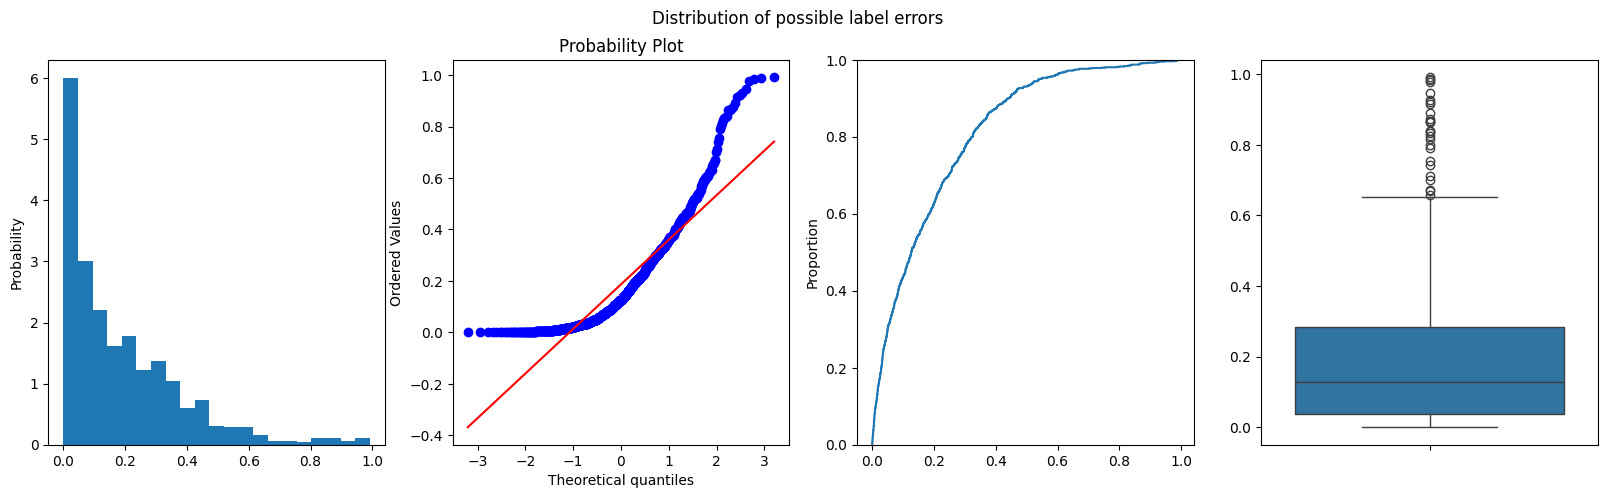

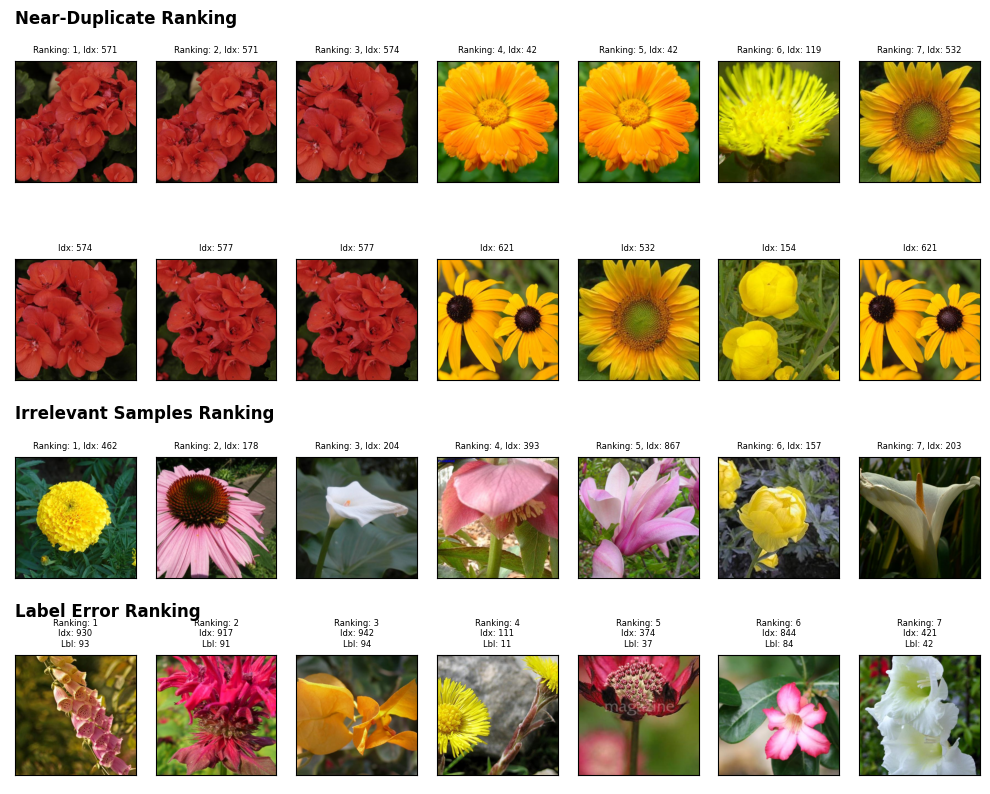

In [4]:
selfclean = SelfClean(
    auto_cleaning=True,
    plot_distribution=True,
    plot_top_N=7,
)
out_dict = selfclean.run_on_dataset(
    dataset=dataset,
    pretraining_type=PretrainingType.DINO,
    num_workers=10,
)

In [5]:
out_dict

{'irrelevants': {'indices': array([462, 178, 204, ..., 539, 490, 889]),
  'scores': array([0.91394668, 0.93338886, 0.94063508, ..., 0.9886512 , 0.9886512 ,
         0.9886512 ]),
  'auto_issues': array([], dtype=int64)},
 'near_duplicates': {'indices': array([[571, 574],
         [571, 577],
         [574, 577],
         ...,
         [156, 753],
         [417, 753],
         [152, 753]], dtype=int32),
  'scores': array([2.3436546e-04, 3.4928322e-04, 5.2106380e-04, ..., 8.1654501e-01,
         8.1822670e-01, 8.2492316e-01], dtype=float32),
  'auto_issues': array([], dtype=int64)},
 'label_errors': {'indices': array([930, 917, 942, ..., 576, 574, 571]),
  'scores': array([1.91782342e-04, 3.58312101e-04, 4.40702190e-04, ...,
         9.84974622e-01, 9.87740629e-01, 9.91478174e-01]),
  'auto_issues': array([], dtype=int64)}}